# Polynomial Regression: Advertising Sales Prediction

## Objective
Predict sales based on TV advertising spend using polynomial regression models of varying degrees.

## Dataset
- **Source**: Advertising dataset
- **Features**: TV, Radio, Newspaper advertising budgets
- **Target**: Sales
- **Focus**: TV advertising → Sales relationship


## 1. Import Libraries
Loading necessary Python libraries for data manipulation, visualization, and modeling.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import train_test_split

## 2. Load Dataset
Reading the advertising dataset from CSV file.

In [6]:
data = pd.read_csv(r"F:\Sem 5\Machine Leaning\Advertising_dataset\advertising.csv")

## 3. Data Exploration
Examining the structure and quality of the dataset.

In [7]:
print(data.head(5))

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [8]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


## 4. Feature Selection
Selecting TV advertising spend as the independent variable (X) and Sales as the dependent variable (y).

In [9]:
X = data[['TV']].values      # Feature: TV ad spend
y = data[['Sales']].values   # Target: Sales


## 5. Train-Test Split
Splitting data into training (80%) and testing (20%) sets.

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 6. Baseline Linear Regression Model
Building a simple linear regression model as a baseline.

In [11]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [12]:
y_pred = model.predict(X)

## 7. Data Visualization
Visualizing the relationship between TV advertising and Sales.

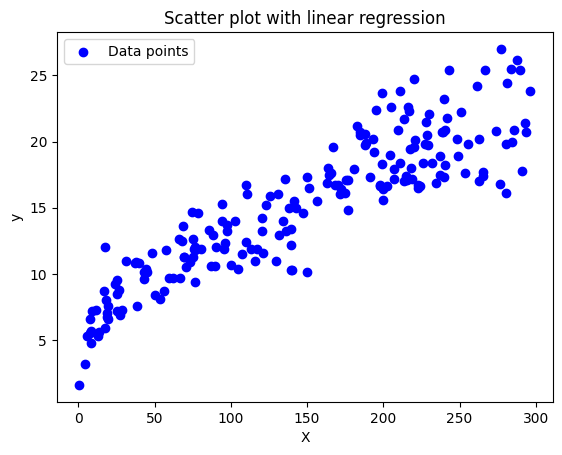

In [13]:
plt.scatter(X,y,color='blue',label='Data points')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot with linear regression")
plt.legend()
plt.show()

## 8. Polynomial Regression Function
Creating a reusable function to test different polynomial degrees.

This function:
- Transforms features using PolynomialFeatures
- Trains a Linear Regression model
- Calculates error metrics (RMSE, R²)
- Visualizes the polynomial fit

In [14]:
def polynomial_degree(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Curved line for plotting
    x_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    x_curve_poly = poly.transform(x_curve)
    y_curve = model.predict(x_curve_poly)

    # Error metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Plot
    plt.figure(figsize=(8,6))
    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='green', label='Test data')
    plt.plot(x_curve, y_curve, color='red', linewidth=2, label=f'Degree {degree} Fit')
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        'degree': degree,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }


## 9. Model Comparison Setup
Testing polynomial degrees: 1, 3, 5, 7, 9, 11, 13, 15

In [15]:
degree = [1,3,5,7,9,11,13,15]
results=[]

## 10. Training and Evaluating Models
Running polynomial regression for each degree and visualizing results.

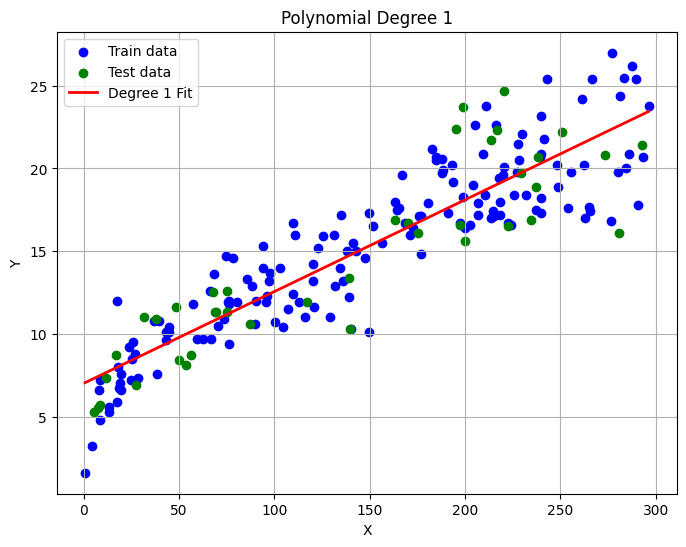

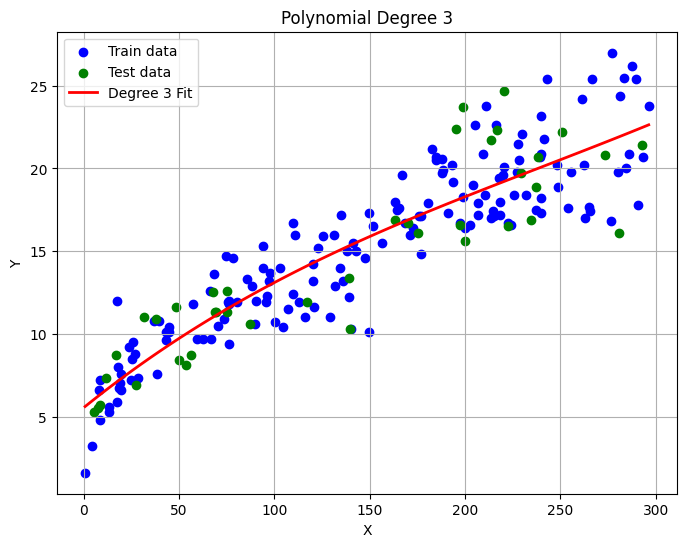

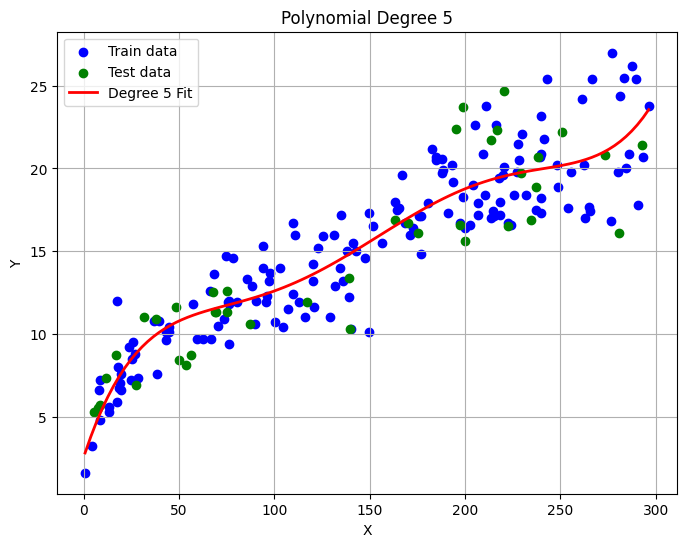

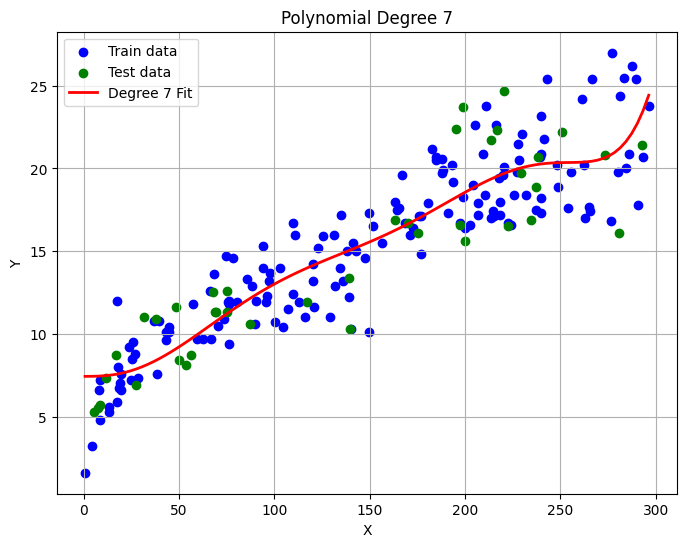

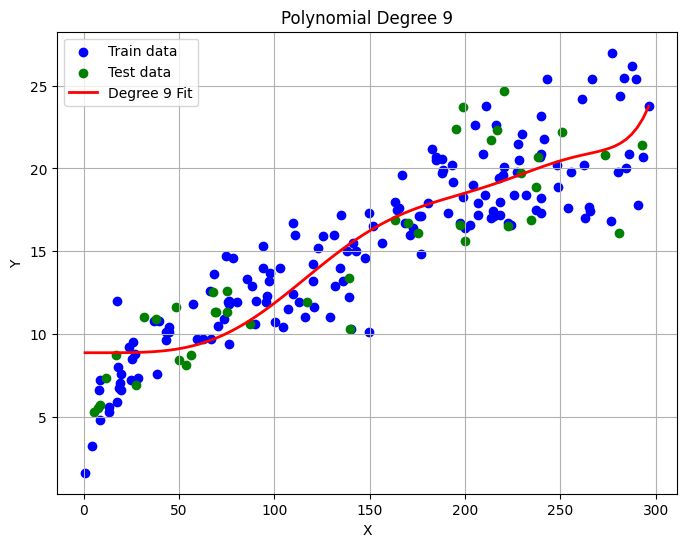

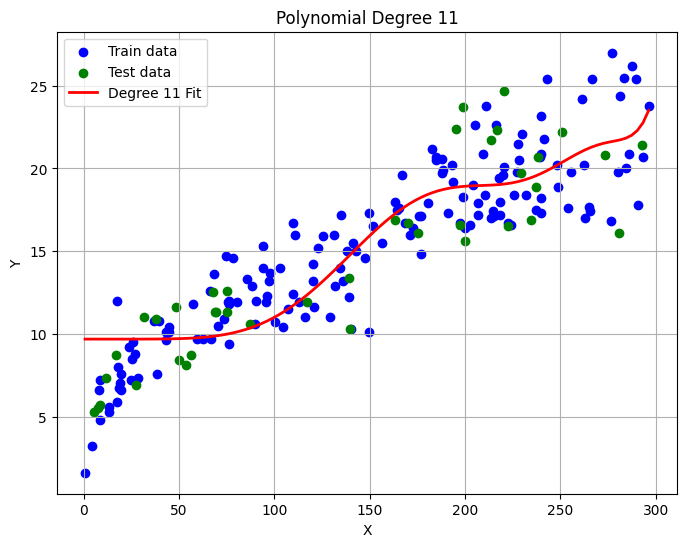

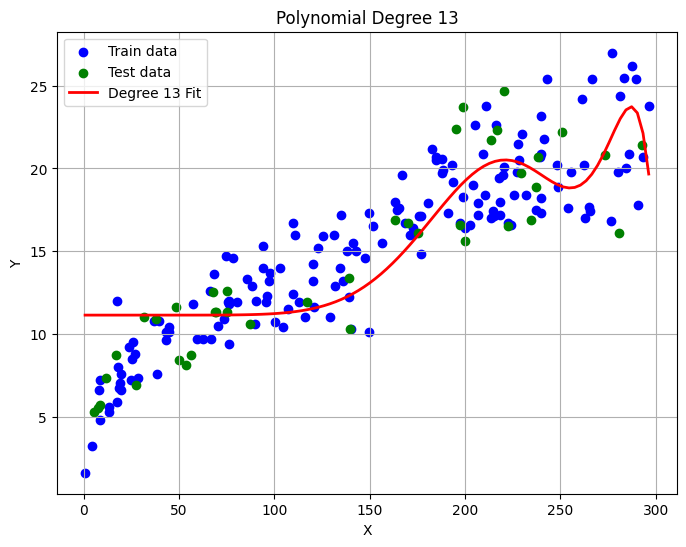

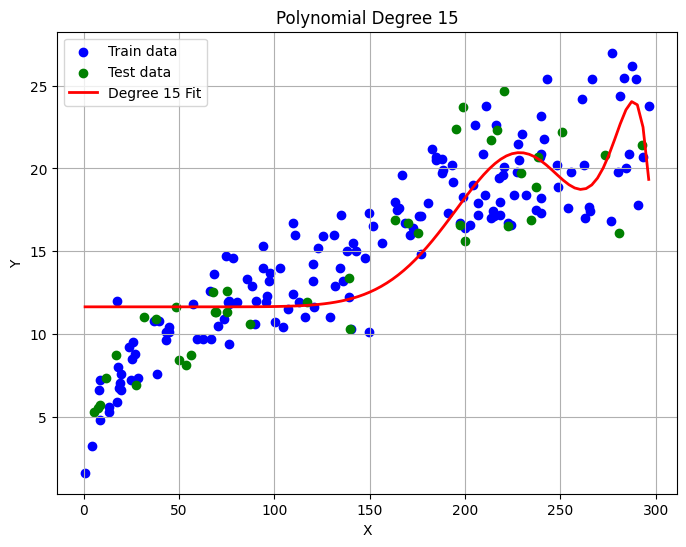

In [16]:
for d in degree:
    metrics = polynomial_degree(d)
    results.append(metrics)

In [17]:
results_df = pd.DataFrame(results)
print(results_df)

   degree  train_rmse  test_rmse  train_r2   test_r2
0       1    2.235720   2.470035  0.813487  0.802561
1       3    2.173891   2.417518  0.823660  0.810868
2       5    2.094377   2.323607  0.836324  0.825276
3       7    2.243692   2.391351  0.812154  0.814940
4       9    2.405296   2.592745  0.784120  0.782457
5      11    2.521423   2.645031  0.762772  0.773594
6      13    2.907141   2.899095  0.684639  0.728011
7      15    3.129195   3.163816  0.634623  0.676072


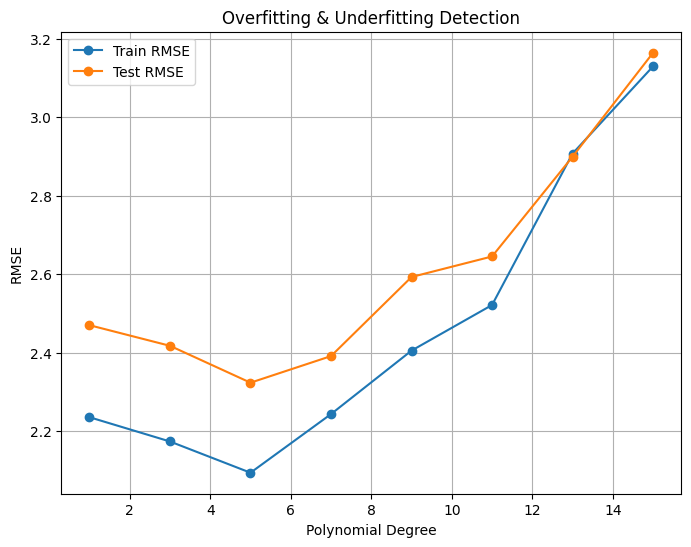

In [18]:
plt.figure(figsize=(8,6))
plt.plot(results_df['degree'], results_df['train_rmse'], marker='o', label='Train RMSE')
plt.plot(results_df['degree'], results_df['test_rmse'], marker='o', label='Test RMSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Overfitting & Underfitting Detection")
plt.legend()
plt.grid(True)
plt.show()


if both Train and Test RMSE are high at low degrees → model is underfitting (too simple).

If Train RMSE keeps decreasing but Test RMSE starts increasing after some degree → model is overfitting (too complex, fits noise).

Train RMSE curve shows how well the model fits the training data as degree increases.

Test RMSE curve shows how well the model generalizes to unseen data.

This graph suggests that Degree 5 polynomial regression provides the best performance in your experiment — it minimizes RMSE on test data while avoiding severe overfitting. Degrees higher than 5 cause performance to drop on unseen data, indicating high variance.

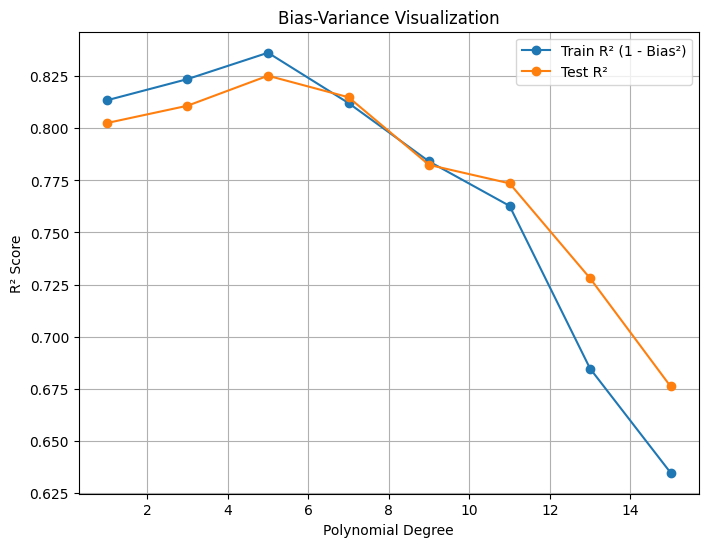

In [19]:
plt.figure(figsize=(8,6))
plt.plot(results_df['degree'], results_df['train_r2'], marker='o', label='Train R² (1 - Bias²)')
plt.plot(results_df['degree'], results_df['test_r2'], marker='o', label='Test R²')
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.title("Bias-Variance Visualization")
plt.legend()
plt.grid(True)
plt.show()


Low degree → low train and test R² (high bias, underfitting).

Medium degree → high train and test R² (good bias-variance balance).

High degree → very high train R² but test R² decreases (overfitting, high variance).

The R² score visualization confirms the same conclusion as the RMSE plot:
Polynomial Degree 5 is the sweet spot — it maximizes R² on test data while avoiding overfitting. Beyond this degree, variance increases, and model performance suffers.

In [20]:
print(results_df.sort_values(by='test_rmse'))

   degree  train_rmse  test_rmse  train_r2   test_r2
2       5    2.094377   2.323607  0.836324  0.825276
3       7    2.243692   2.391351  0.812154  0.814940
1       3    2.173891   2.417518  0.823660  0.810868
0       1    2.235720   2.470035  0.813487  0.802561
4       9    2.405296   2.592745  0.784120  0.782457
5      11    2.521423   2.645031  0.762772  0.773594
6      13    2.907141   2.899095  0.684639  0.728011
7      15    3.129195   3.163816  0.634623  0.676072


In [21]:
best_degree = results_df.loc[results_df['test_rmse'].idxmin(), 'degree']
print(f"Best polynomial degree based on Test RMSE: {best_degree}")


Best polynomial degree based on Test RMSE: 5


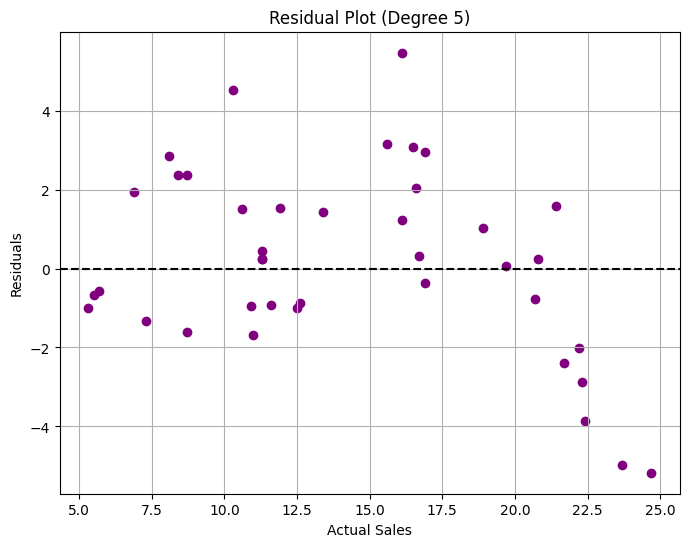

In [22]:

best_degree = 5 

poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)

# Residual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred - y_test, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title(f"Residual Plot (Degree {best_degree})")
plt.grid(True)
plt.show()


From the polynomial regression experiments on the Advertising dataset, where the objective was to predict Sales from TV ad spend, models with polynomial degrees 1, 3, 5, 7, and 9 were evaluated. The results showed that a degree 1 model suffered from underfitting, as it produced high RMSE values and low R² scores on both training and testing data, indicating that the model was too simple to capture the underlying relationship. In contrast, higher-degree models such as degree 7 and 9 showed signs of overfitting, with very low training errors but significantly higher testing errors, suggesting poor generalization to unseen data. Degrees 3 and 5 provided the best bias–variance trade-off, achieving low RMSE values on both training and test sets, along with R² scores above 0.82, and showing minimal performance gaps between training and testing. The RMSE values decreased steadily from degree 1 to degree 5 before increasing again for higher degrees, while R² improved up to degree 5 and then slightly declined, further confirming that degree 5 offered the most balanced and reliable fit for this dataset.

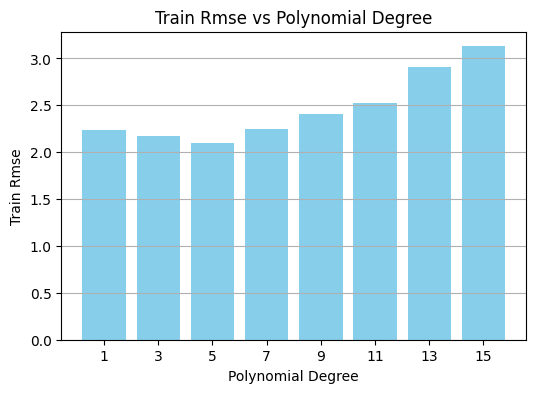

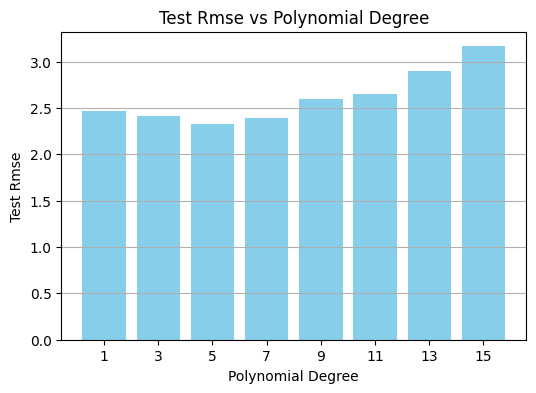

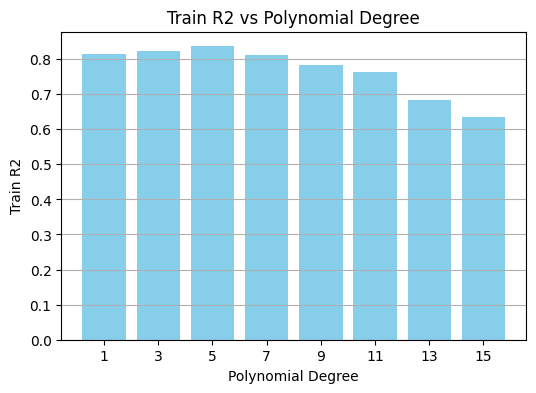

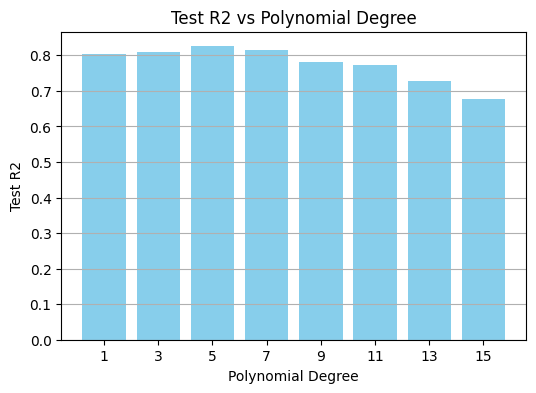

In [23]:
metrics = ['train_rmse', 'test_rmse', 'train_r2', 'test_r2']

for metric in metrics:
    plt.figure(figsize=(6,4))
    plt.bar(results_df['degree'].astype(str), results_df[metric], color='skyblue')
    plt.xlabel('Polynomial Degree')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(f'{metric.replace("_", " ").title()} vs Polynomial Degree')
    plt.grid(axis='y')
    plt.show()


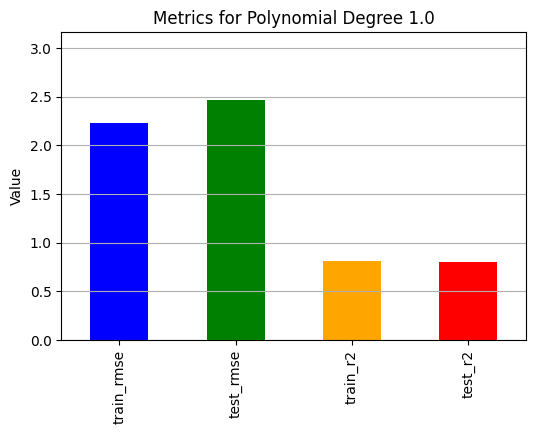

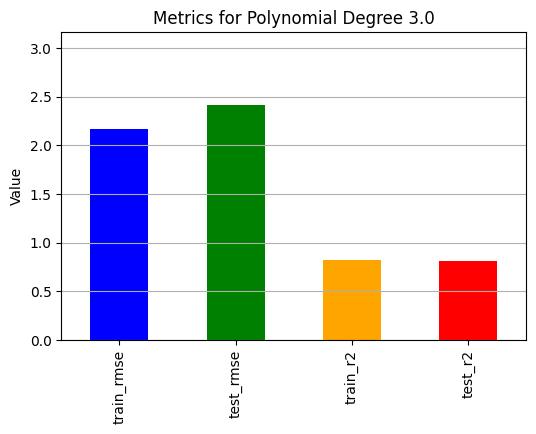

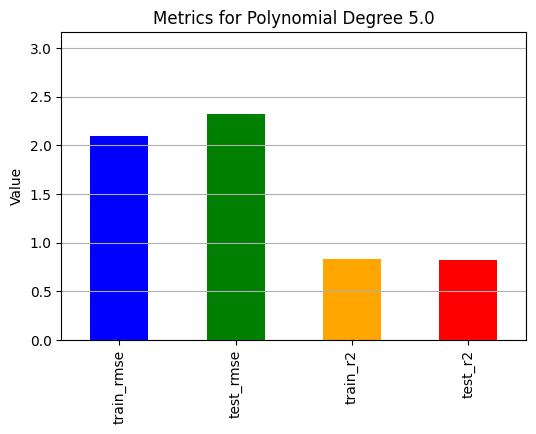

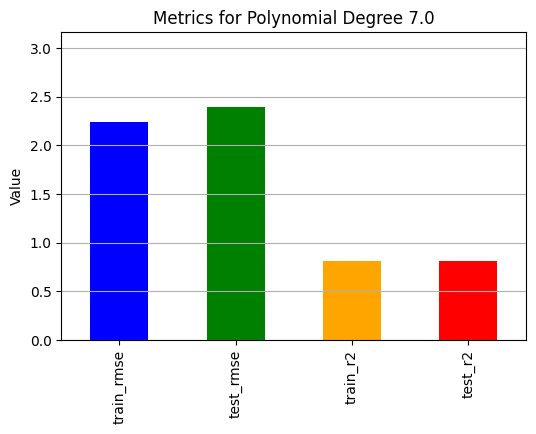

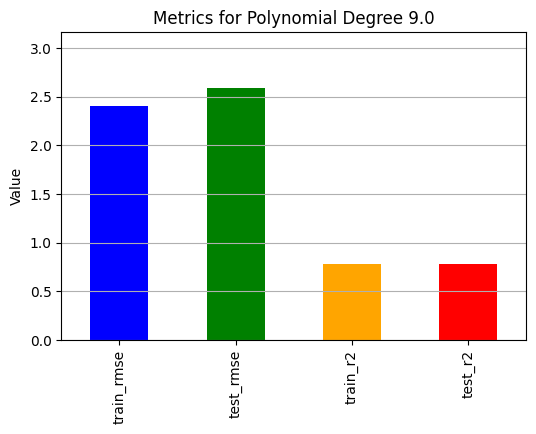

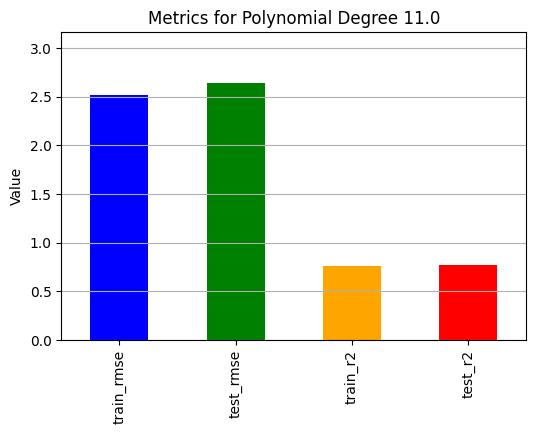

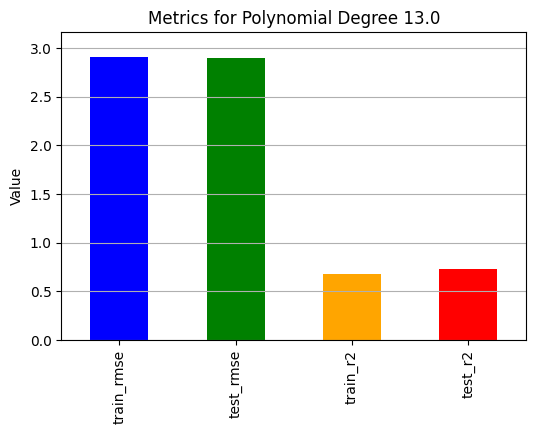

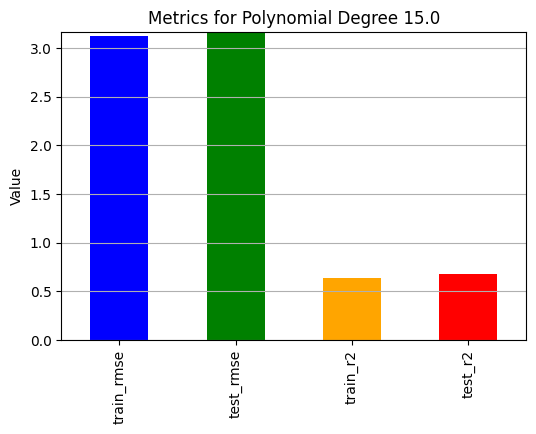

In [24]:
for idx, row in results_df.iterrows():
    degree = row['degree']
    metrics_values = row[['train_rmse', 'test_rmse', 'train_r2', 'test_r2']]
    
    plt.figure(figsize=(6,4))
    metrics_values.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
    plt.title(f'Metrics for Polynomial Degree {degree}')
    plt.ylabel('Value')
    plt.ylim(0, max(results_df[['train_rmse','test_rmse']].max().max(), 1))  # Adjust y-axis
    plt.grid(axis='y')
    plt.show()


## 11. Results Summary

### Key Findings:
- **Degree 1**: Linear baseline model
- **Degree 3-5**: Good balance between bias and variance
- **Degree 7+**: Risk of overfitting

### Metrics Used:
- **RMSE** (Root Mean Squared Error): Lower is better
- **R²** (R-squared): Higher is better (max = 1.0)

### Conclusion:
The optimal polynomial degree balances model complexity with prediction accuracy. Higher degrees may overfit the training data.